In [1]:
import sys
import ROOT as r
import uproot
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from array import array as arr

%jsroot on

Welcome to JupyROOT 6.30/02


In [3]:
#fin = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pi0_v2.root", "READ")
#fin = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pionOutputs/MCv2/pionMC.root", "READ")
#fin = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pionOutputs/mcNominal/merged.root", "READ")
#fin = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pionOutputs/mcNorm/merged.root", "READ")

# fin = r.TFile.Open('root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/pi0Selection/mc/outputs/merged.root', "READ")
# fin = r.TFile.Open('root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/pi0Selection/mcNormV3/outputs/merged.root', "READ")
# fin = r.TFile.Open('root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/pi0Selection/data/outputs/merged.root', "READ")
# fin = r.TFile.Open('root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/pi0Selection/dataNorm/outputs/merged.root', "READ")

fin = r.TFile.Open('root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/pi0Selection/mc_openAngle/outputs/merged.root', "READ") #normalized MC

In [35]:
t = fin.Get("allEvents/seqPlots")
t.ls()

TDirectoryFile*		seqPlots	seqPlots
 OBJ: TH1D	cafanauniq288	 : 0 at: 0xcab7dd0
 OBJ: TH1D	cafanauniq289	 : 0 at: 0xcab8c40
 OBJ: TH1D	cafanauniq290	 : 0 at: 0xcab7530
 OBJ: TH1D	cafanauniq291	 : 0 at: 0xcab22f0
 OBJ: TH1D	cafanauniq292	 : 0 at: 0xcab2ce0
 OBJ: TH1D	cafanauniq293	 : 0 at: 0xcab36d0
 OBJ: TH1D	cafanauniq294	 : 0 at: 0xcab4b10
 OBJ: TH1D	cafanauniq295	 : 0 at: 0xcab9f70
 OBJ: TH1D	cafanauniq296	 : 0 at: 0xcaba670
 OBJ: TH1D	cafanauniq297	 : 0 at: 0xcabaf20
 OBJ: TH1D	cafanauniq298	 : 0 at: 0xcabb940
 OBJ: TH1D	cafanauniq299	 : 0 at: 0xcabc300
 OBJ: TH1D	cafanauniq300	 : 0 at: 0xcabcf30
 OBJ: TH1D	cafanauniq301	 : 0 at: 0xcabd970
 OBJ: TH1D	seqNoCut_tNueEnergy	 : 0 at: 0xe6e32b0
 OBJ: TH1D	seqFiducial_tNueEnergy	 : 0 at: 0xe6ea2f0
 OBJ: TH1D	seqchargedPionVeto_tNueEnergy	 : 0 at: 0xe6ead40
 OBJ: TH1D	seqBarycenter_tNueEnergy	 : 0 at: 0xe6eb680
 OBJ: TH1D	seqMuonTrack_tNueEnergy	 : 0 at: 0xe6ebfc0
 OBJ: TH1D	seqMuonDeltaTrkVertex_tNueEnergy	 : 0 at: 0xe6ec910
 OBJ: TH1D	seq

In [4]:
h_truthNue = fin.Get("fid/seqPlots/seqNoCut_NumSignal")
truth_nue = h_truthNue.GetBinContent(7)
truth_nue

942064.8008924155

In [5]:
def getHists(dict, dirName):
    dir = fin.Get(dirName)
    # Loop over keys
    for key in dir.GetListOfKeys():
        obj = key.ReadObj()
        # Check if it is a histogram
        if obj.InheritsFrom("TH1") and not obj.InheritsFrom("TH2"):
            obj.SetName(key.GetName())
            dict[key.GetName()] = obj

In [6]:
n_signal = []
n_1MuNPi = []
n_nue = []
n_numu = []
n_nc = []
n_cosmic = []
n_all = []
n_true = []

dir = fin.Get("s1Mu1Pi0/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    print(key)
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_signal.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("b1MuNPi0/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_1MuNPi.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("bNuE/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_nue.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("bNuMu/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_numu.append(obj.Integral(0, obj.GetNbinsX()+1))
        
dir = fin.Get("allEvents/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_all.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("bNC/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_nc.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("bCosmic/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_cosmic.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("fid/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_true.append(obj.GetBinContent(7))

Name: seqNoCut_tNueEnergy Title: 
Name: seqFiducial_tNueEnergy Title: 
Name: seqchargedPionVeto_tNueEnergy Title: 
Name: seqBarycenter_tNueEnergy Title: 
Name: seqMuonTrack_tNueEnergy Title: 
Name: seqMuonDeltaTrkVertex_tNueEnergy Title: 
Name: seqMuonCollectionHits_tNueEnergy Title: 
Name: seqMuonChi2_tNueEnergy Title: 
Name: seqMuonTrkLen_tNueEnergy Title: 
Name: seqPhotonCandidates_tNueEnergy Title: 
Name: seqopenAngle_tNueEnergy Title: 
Name: seqShowersContained_tNueEnergy Title: 
Name: seqprimaryPhotonEnergy_tNueEnergy Title: 
Name: seqsecondaryPhotonEnergy_tNueEnergy Title: 


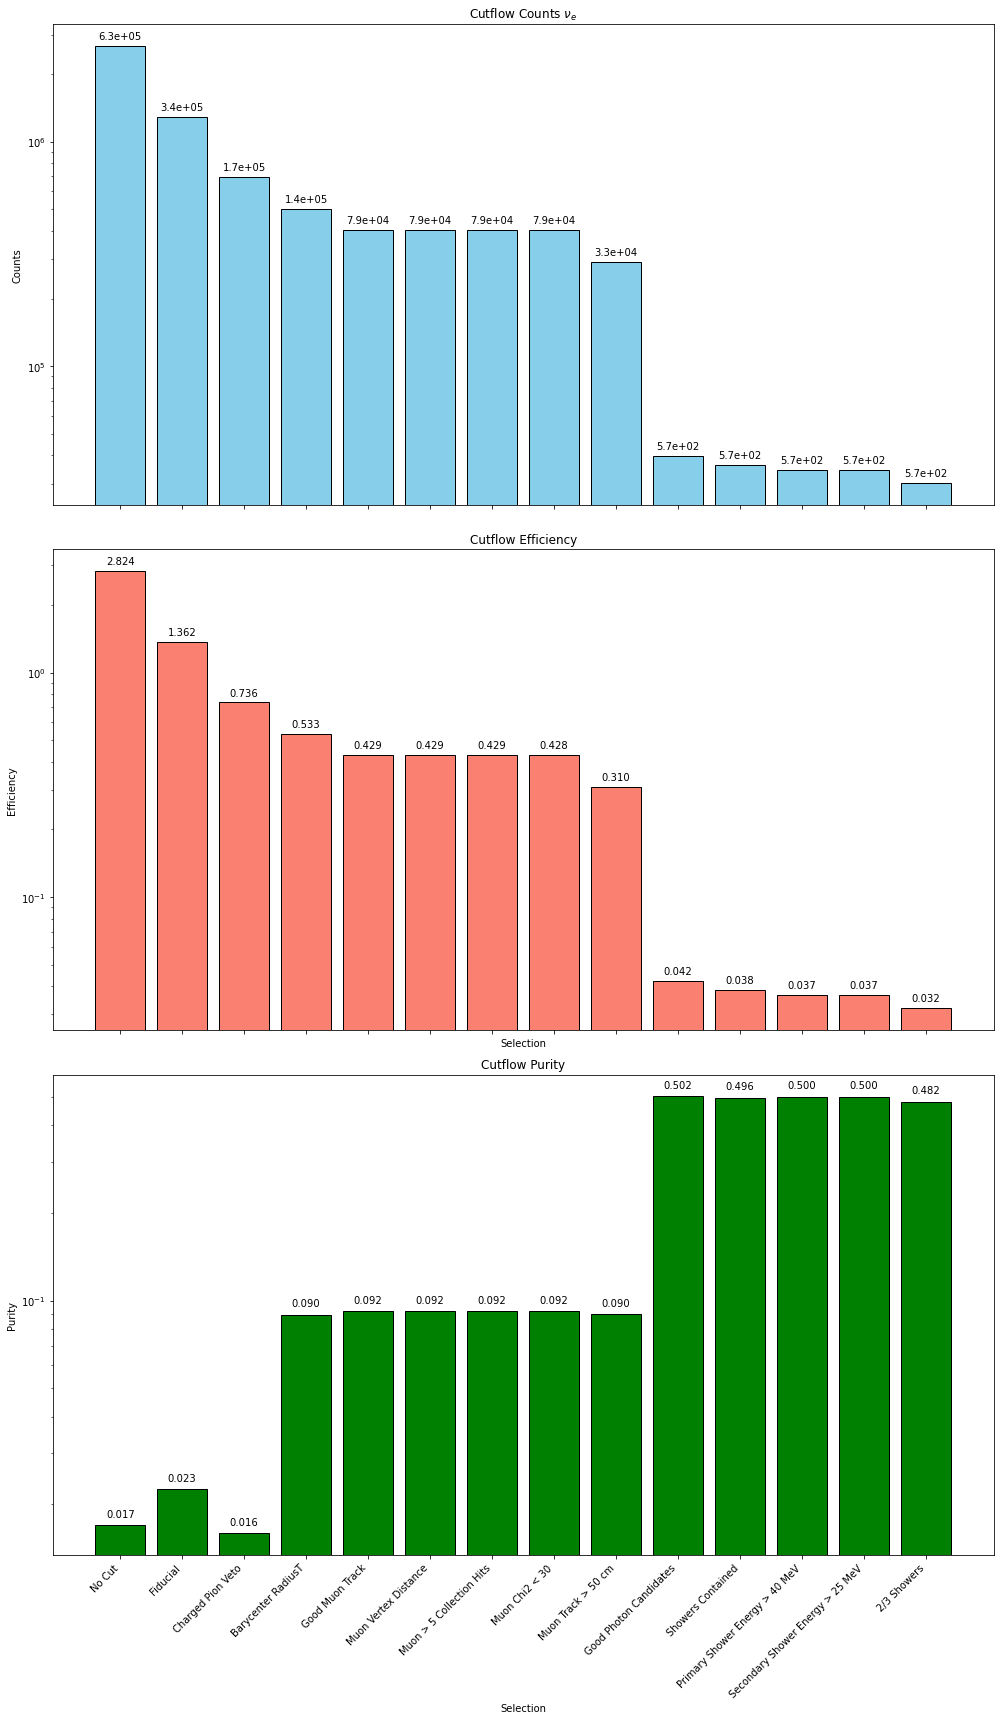

In [7]:
# Example data
labels = {"NoCut": "No Cut", "Fiducial": "Fiducial", "ChargedPionVeto": "Charged Pion Veto", "BarycenterRadiusT": "Barycenter RadiusT", "MuonTrack": "Good Muon Track", "MuonDeltaTrkVertex": "Muon Vertex Distance",
    "MuonCollectionHits": "Muon > 5 Collection Hits", "MuonChi2": "Muon Chi2 < 30", "MuonTrkLen": "Muon Track > 50 cm", 
    "PhotonCandidates": "Good Photon Candidates", "ShowersContained": "Showers Contained", "primaryPhotonEnergy": "Primary Shower Energy > 40 MeV", "secondaryPhotonEnergy": "Secondary Shower Energy > 25 MeV", 
    "nShowers": "2/3 Showers"}

eff = [x/n_true[0] for x in n_signal]
purity = [x/n_all[i] for i, x in enumerate(n_signal)]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14, 24), sharex=True)

#Top plot
bars1 = ax1.bar(range(len(n_signal)), n_signal, edgecolor="black", color="skyblue")
ax1.set_yscale("log")
ax1.set_ylabel("Counts")
ax1.set_title(r"Cutflow Counts $\nu_e$")
for bar, val in zip(bars1, n_nue):
   height = bar.get_height()
   ax1.text(bar.get_x() + bar.get_width()/2, height*1.05, f"{val:.1e}", ha='center', va='bottom')

# Bottom plot
bars2 = ax2.bar(range(len(eff)), eff, edgecolor="black", color="salmon")
ax2.set_yscale("log")
ax2.set_xlabel("Selection")
ax2.set_ylabel("Efficiency")
ax2.set_title("Cutflow Efficiency")
for bar, val in zip(bars2, eff):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height*1.05, f"{val:.3f}", ha='center', va='bottom')

# Bottom plot
bars3 = ax3.bar(range(len(purity)), purity, edgecolor="black", color="green")
ax3.set_yscale("log")
ax3.set_xlabel("Selection")
ax3.set_ylabel("Purity")
ax3.set_title("Cutflow Purity")
for bar, val in zip(bars3, purity):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height*1.05, f"{val:.3f}", ha='center', va='bottom')

# Set x-axis labels
ax3.set_xticks(range(len(labels.keys())))
ax3.set_xticklabels(labels.values(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [8]:
signal_seqPlots = {}
muNpi_seqPlots = {}
numu_seqPlots = {}
nue_seqPlots = {}
nc_seqPlots = {}
cosmic_seqPlots = {}
all_seqPlots = {}

getHists(signal_seqPlots, "s1Mu1Pi0/seqPlots")
getHists(muNpi_seqPlots, "b1MuNPi0/seqPlots")
getHists(numu_seqPlots, "bNuMu/seqPlots")
getHists(nue_seqPlots, "bNuE/seqPlots")
getHists(nc_seqPlots, "bNC/seqPlots")
getHists(cosmic_seqPlots, "bCosmic/seqPlots")
getHists(all_seqPlots, "allEvents/seqPlots")


allEle = {}
allMu = {}
allPro = {}
allPh = {}
allPi0 = {}
allPiC = {}
allOther = {}

getHists(allEle, "allEle/seqPlots")
getHists(allMu, "allMu/seqPlots")
getHists(allPro, "allPro/seqPlots")
getHists(allPh, "allPh/seqPlots")
getHists(allPi0, "allPi0/seqPlots")
getHists(allPiC, "allPiC/seqPlots")
getHists(allOther, "allOther/seqPlots")

for val in numu_seqPlots.values():
    val.SetLineColor(r.kRed)

for val in nc_seqPlots.values():
    val.SetLineColor(r.kBlue)

for val in cosmic_seqPlots.values():
    val.SetLineColor(r.kGreen)

In [9]:
v_seqPlots = {r"1#mu1#pi0": signal_seqPlots, r"1#muN#pi0": muNpi_seqPlots, r"#nu_{e}": nue_seqPlots, r"#nu_{#mu}": numu_seqPlots, r"nc": nc_seqPlots, r"cosmic": cosmic_seqPlots}

# labels = {"NoCut": "No Cut", "Fiducial": "Fiducial", "chargedPionVeto":"Charged Pion Veto", "Barycenter": "Barycenter", "MuonTrack": "Good Muon Track", "MuonDeltaTrkVertex": "Muon Vertex Distance",
#     "MuonCollectionHits": "Muon > 5 Collection Hits", "MuonChi2": "Muon Chi2 < 30", "MuonTrkLen": "Muon Track > 50 cm", 
#     "PhotonCandidates": "Good Photon Candidates", "ShowersContained": "Showers Contained", "primaryPhotonEnergy": "Primary Shower Energy > 25 MeV", "secondaryPhotonEnergy": "Secondary Shower Energy > 25 MeV", 
#     "nShowers": "2 Showers"}
labels = {"NoCut": "No Cut", "Fiducial": "Fiducial", "chargedPionVeto":"Charged Pion Veto", "Barycenter": "Barycenter", "MuonTrack": "Good Muon Track", "MuonDeltaTrkVertex": "Muon Vertex Distance",
    "MuonCollectionHits": "Muon > 5 Collection Hits", "MuonChi2": "Muon Chi2 < 30", "MuonTrkLen": "Muon Track > 50 cm", 
    "PhotonCandidates": "Good Photon Candidates", "openAngle": "Open Angle > 0.35", "ShowersContained": "Showers Contained", "primaryPhotonEnergy": "Primary Shower Energy > 25 MeV", "secondaryPhotonEnergy": "Secondary Shower Energy > 25 MeV", 
    }

fout = r.TFile.Open("pi0Combined.root", "RECREATE")

n = len(labels.keys())

totalEvents = 1

df_seq = pd.DataFrame({
    "selection": pd.Series(index=range(n), dtype="string"),
    r"1#mu1#pi0": pd.Series(index=range(n), dtype="float64"),
    r"1#muN#pi0": pd.Series(index=range(n), dtype="float64"),
    r"#nu_{e}": pd.Series(index=range(n), dtype="float64"),
    r"#nu_{#mu}": pd.Series(index=range(n), dtype="float64"),
    "nc": pd.Series(index=range(n), dtype="float64"),
    "cosmic": pd.Series(index=range(n), dtype="float64"),
})

c1 = r.TCanvas("c1", "c1", 800, 600)
l = r.TLegend(0.7, 0.7, 0.9, 0.9)
for i, key in enumerate(nue_seqPlots.keys()):
    #if i > 0: break
    l.Clear()
    drawS = "hist"
    maxY = -1
    totalEvents = all_seqPlots[key].Integral(0, all_seqPlots[key].GetNbinsX()+1)
    if totalEvents == 0: totalEvents = 1e-10
    label = labels[key.split('_')[0].replace('seq', '')]
    if i < len(labels.keys()): df_seq.at[i, 'selection'] = label
    for n, p in v_seqPlots.items():
        p[key].Draw(drawS)
        drawS += " same"
        if p[key].GetMaximum() > maxY : maxY = p[key].GetMaximum()
        purity = p[key].Integral(0, p[key].GetNbinsX()+1) / totalEvents        
        l.AddEntry(p[key], f'{n} p={purity:.2f}', 'l')
        if i < len(labels.keys()):
            df_seq.at[i, n] = p[key].Integral(0, p[key].GetNbinsX()+1)
    v_seqPlots[r"1#mu1#pi0"][key].GetYaxis().SetRangeUser(0, maxY*1.1)
    t1 = r.TLatex()
    t1.SetNDC()  # Use normalized coordinates (0-1)
    t1.SetTextSize(0.04)
    t1.DrawLatex(0.2, 0.8, f"Sequential: {label}")  # x, y in NDC
    l.Draw()
    c1.Update()
    fout.cd()
    c1.Write(key)

fout.Close()

In [10]:
# fData = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pionOutputs/dataNorm/merged.root", "READ")
# fData = r.TFile.Open('root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/pi0Selection/data/outputs/merged.root', "READ")
#fData = r.TFile.Open('root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/pi0Selection/dataNormV3/outputs/merged.root', "READ")
#fData = r.TFile.Open('root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/pi0Selection/data_openAngle/outputs/merged.root', "READ")
fData = r.TFile.Open('root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/pi0Selection/run2NumiFull/data.root', "READ") #full run2 numi data, no normalization

dataPlots = {}
dataNM1 = {}

dir = fData.Get("allEvents/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        obj.SetName(key.GetName())
        dataPlots[key.GetName()] = obj

dir = fData.Get("allEvents/nm1Plots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        obj.SetName(key.GetName())
        dataNM1[key.GetName()] = obj



In [11]:
fout = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pi0CombinedV2.root", "RECREATE")

n = len(labels.keys())

rebin = -1

#print(r.TColor.GetColor("#5790fc"))
r.gStyle.SetPalette(r.kBird)
ncolors = r.gStyle.GetNumberOfColors()

# = [r.kAzure-2, r.kOrange-2, r.kRed+2, r.kGray+1, r.kViolet-1, r.kOrange-7, r.kOrange+7, r.kYellow-2, r.kGray+2, r.kCyan-9]
colors = [r.kBlue+2, r.kAzure+7, r.kGreen+3, r.kGreen-6, r.kOrange-1, r.kYellow-4]
colors = [r.kOrange+8, r.kViolet, r.kBlue+2, r.kAzure+7, r.kGreen-2, r.kYellow-4]


c1 = r.TCanvas("c1", "c1", 800, 600)
l = r.TLegend(0.7, 0.7, 0.9, 0.9)
for i, key in enumerate(nue_seqPlots.keys()):
    #if i > 0: break
    l.Clear()
    drawS = "hist"
    maxY = -1
    if (i+1) % len(labels) != 0: continue
    totalEvents = all_seqPlots[key].Integral(0, all_seqPlots[key].GetNbinsX()+1)
    if totalEvents == 0: totalEvents = 1e-10
    label = labels[key.split('_')[0].replace('seq', '')]
    h_stack = r.THStack("h_stack", "")

    mcI = 0  
    dataI = dataPlots[key].Integral(0, dataPlots[key].GetNbinsX()+1)
    for idx, (n, p) in enumerate(v_seqPlots.items()):
        mcI += p[key].Integral(0, p[key].GetNbinsX()+1)
    scale = dataI / mcI

    for idx, (n, p) in enumerate(v_seqPlots.items()):
        if (idx == 0):
            h_stack.SetTitle(f";{p[key].GetXaxis().GetTitle()};{p[key].GetYaxis().GetTitle()}")
        this_h = p[key].Clone()
        this_h.SetLineColor(r.kBlack)
        this_h.Scale(scale)
        this_h.SetFillColor(colors[idx])
        if rebin > 0: this_h.Rebin(rebin)
        h_stack.Add(this_h)
        if p[key].GetMaximum() > maxY : maxY = p[key].GetMaximum()
        purity = p[key].Integral(0, p[key].GetNbinsX()+1) / totalEvents        
        l.AddEntry(this_h, f'{n} p={purity:.2f}', 'F')

    maxVal = h_stack.GetMaximum()
    if dataPlots[key].GetMaximum() > maxVal: maxVal = dataPlots[key].GetMaximum()
    maxVal *= 2
    h_stack.SetMaximum(maxVal)
    h_stack.Draw("hist")
    c1.Update()
    dataPlots[key].SetMarkerStyle(21)
    if rebin > 0: dataPlots[key].Rebin(rebin)
    dataPlots[key].Draw("same PE")
    l.AddEntry(dataPlots[key], "Data", "P")
    r.gPad.Update()
    l.Draw()
    c1.Update()
    fout.cd()
    c1.Write(key.split('_')[-1]+"Stacked")

fout.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
df_seq.columns = ["Selection", "1#mu1#pi0", "1#muN#pi0", "nue", "numu", "nc", "cosmic"]

#df_nm1.columns = ["Selection", "nue", "numu", "nc", "cosmic"]

In [13]:
df_seq['Background'] = df_seq['1#muN#pi0'] + df_seq['nue'] + df_seq["numu"] + df_seq["nc"] + df_seq["cosmic"]
df_seq["Total"] = df_seq["Background"] + df_seq["1#mu1#pi0"]
df_seq['Purity'] = df_seq['1#mu1#pi0'] / df_seq['Total']
df_seq["Delta Purity"] = df_seq["Purity"] - df_seq["Purity"].shift(1)
df_seq['Efficiency'] = df_seq['1#mu1#pi0'] / truth_nue
df_seq["Delta Efficiency"] = df_seq["Efficiency"] - df_seq["Efficiency"].shift(1)
df_seq.round(3)

,Selection,1#mu1#pi0,1#muN#pi0,nue,numu,nc,cosmic,Background,Total,Purity,Delta Purity,Efficiency,Delta Efficiency
0,No Cut,2660190.849,596669.109,630757.169,1.123341e+07,3176861.209,1.389052e+08,1.545429e+08,1.572031e+08,0.017,NaN,2.824,NaN
1,Fiducial,1282761.898,282218.707,344239.765,5.524602e+06,1853723.643,4.763191e+07,5.563669e+07,5.691946e+07,0.023,0.006,1.362,-1.462
2,Charged Pion Veto,692963.895,136622.366,174685.532,3.877105e+06,1412999.708,3.732012e+07,4.292153e+07,4.361450e+07,0.016,-0.007,0.736,-0.626
3,Barycenter,502413.407,93827.148,141472.131,3.085930e+06,1129791.993,6.566379e+05,5.107660e+06,5.610073e+06,0.090,0.074,0.533,-0.202
4,Good Muon Track,403946.642,76267.473,79377.491,2.719013e+06,532887.432,5.822980e+05,3.989844e+06,4.393790e+06,0.092,0.002,0.429,-0.105
5,Muon Vertex Distance,403946.642,76267.473,79377.491,2.719013e+06,532887.432,5.822980e+05,3.989844e+06,4.393790e+06,0.092,0.000,0.429,0.000
6,Muon > 5 Collection Hits,403946.642,76267.473,79377.491,2.719013e+06,532887.432,5.822980e+05,3.989844e+06,4.393790e+06,0.092,0.000,0.429,0.000
7,Muon Chi2 < 30,403372.084,75387.343,79088.798,2.709955e+06,526476.389,5.799143e+05,3.970822e+06,4.374194e+06,0.092,0.000,0.428,-0.001
8,Muon Track > 50 cm,291657.984,47890.162,33385.802,2.262736e+06,185840.379,4.273819e+05,2.957234e+06,3.248892e+06,0.090,-0.002,0.310,-0.119
9,Good Photon Candidates,39974.991,21513.693,574.608,9.932548e+03,7604.825,0.000000e+00,3.962567e+04,7.960066e+04,0.502,0.412,0.042,-0.267


In [34]:
c1 = r.TCanvas("c1", "c1", 800, 600)

combined = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pi0CombinedV2.root", "READ")

c_pi0Mass = combined.Get("Pi0MassStacked")

for h in c_pi0Mass.GetListOfPrimitives():
    print(h.GetName())

h_pi0Mass = c_pi0Mass.GetPrimitive("h_stack")
h_sum = h_pi0Mass.GetStack().Last()

#h_data = c_pi0Mass.GetPrimitive("seqnShowers_Pi0Mass")
h_data = c_pi0Mass.GetPrimitive("seqsecondaryPhotonEnergy_Pi0Mass")

f1 = r.TF1("f1", "crystalball", 0, 200)
f1.SetParameters(3000, 140, 10, 0.1, 0.001)
f1.SetParLimits(0, 200, 50000)
f1.SetParLimits(1, 0, 180)
f1.SetParLimits(2, 0, 1525)
f1.SetParLimits(3, 1e-15, 100)
f1.SetParLimits(4, 1e-15, 1000)
f2 = r.TF1("f2", "crystalball", 0, 200)
f2.SetParameters(3000, 140, 10, 0.1, 0.001)
f2.SetParLimits(0, 200, 50000)
f2.SetParLimits(1, 0, 180)
f2.SetParLimits(2, 0, 1525)
f2.SetParLimits(3, 1e-15, 100)
f2.SetParLimits(4, 1e-15, 1000)

h_sum.Fit(f1, "LEMB", "", 10, 160)
h_data.Fit(f2, "LEMB", "", 10, 160)

mean = h_sum.GetMean()
print("mean", mean)

#c1.cd()
#h_pi0Mass.Draw()
c_pi0Mass.Draw()
f1.Draw("same")

f2.SetLineColor(r.kBlack)
f2.Draw("same")

t1 = r.TLatex()
t2 = r.TLatex()
t1.SetTextSize(0.03)
t2.SetTextSize(0.03)
#t1.DrawLatexNDC(0.2, 0.7, f'Fit Parameters: #mu={f1.GetParameter(1):.2f}')
#t2.DrawLatexNDC(0.2, 0.6, f'#sigma={f1.GetParameter(2):.2f}, #alpha={f1.GetParameter(3):.2f}, N={f1.GetParameter(4):.2f}')

l1 = r.TLegend(0.15, 0.6, 0.45, 0.8)
l1.AddEntry(f1, f"MC Fit: #mu={f1.GetParameter(1):.2f}#pm{f1.GetParError(1):.2f}", "l")
l1.AddEntry(f2, f"Data Fit: #mu={f2.GetParameter(1):.2f}#pm{f2.GetParError(1):.2f}", "l")
l1.Draw("same")


chi2 = h_sum.Chi2Test(h_data, "WW CHI2/NDF")
pValue = h_sum.Chi2Test(h_data, "WW")
k = h_sum.KolmogorovTest(h_data, "DXU")

print("Chi2/NDF:", chi2)
print("p-value:", pValue)
print("Kolmogorov:", k)

TFrame
h_stack
seqsecondaryPhotonEnergy_Pi0Mass
TPave
mean 181.4802961632995
Chi2/NDF: 1.4944870012503804
p-value: 0.014810509253840498
Kolmogorov: 0.06
 FCN=7907.55 FROM MINOS     STATUS=SUCCESSFUL    153 CALLS         912 TOTAL
                     EDM=1.29425e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.84768e+04   1.24210e+02   9.60301e-06   2.65287e-03
   2  Mean         1.20328e+02   6.85264e-02  -8.29155e-07  -5.64734e-02
   3  Sigma        1.92280e+01   6.90166e-02  -1.27259e-07   1.69114e-01
   4  Alpha        7.75365e-01   8.23387e-03   5.59201e-06  -1.30691e-01
   5  N            8.80105e+00   7.29348e-01   7.29348e-01  -3.70839e-02
                               ERR DEF= 0.5
 FCN=2629.89 FROM MINOS     STATUS=PROBLEMS       72 CALLS        1056 TOTAL
                     EDM=3.89908e-07    STRATEGY= 1      ERR

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.



In [15]:
h_showerE = combined.Get("rShowerEnergyStacked")
h_showerE.Draw()

h_mc = h_showerE.GetPrimitive("h_stack")
h_mc = h_mc.GetStack().Last()

h_data = h_showerE.GetPrimitive("seqnShowers_rShowerEnergy")

chi2 = h_mc.Chi2Test(h_data, "WW CHI2/NDF")
pValue = h_mc.Chi2Test(h_data, "WW")
k = h_mc.KolmogorovTest(h_data, "DUX")

print("Chi2/NDF:", chi2)
print("p-value:", pValue)
print("Kolmogorov:", k)

TypeError: double TH1::Chi2Test(const TH1* h2, const char* option = "UU", double* res = nullptr) =>
    TypeError: could not convert argument 1

In [16]:
%jsroot on
h_showerE = combined.Get("rSubleadingShowerEnergyStacked")
h_showerE.SetLeftMargin(0.15)
#h_showerE.GetPrimitive("h_stack").GetStack().First().GetYaxis().SetRangeUser(0, 20000)
h_showerE.Draw()

h_mc = h_showerE.GetPrimitive("h_stack")
h_mc = h_mc.GetStack().Last()

h_data = h_showerE.GetPrimitive("seqnShowers_rSubleadingShowerEnergy")

chi2 = h_mc.Chi2Test(h_data, "WW CHI2/NDF")
pValue = h_mc.Chi2Test(h_data, "WW")
k = h_mc.KolmogorovTest(h_data, "DUX") #debug, underflow, pseudoexperiments

print("Chi2/NDF:", chi2)
print("p-value:", pValue)
print("Kolmogorov:", k)

TypeError: double TH1::Chi2Test(const TH1* h2, const char* option = "UU", double* res = nullptr) =>
    TypeError: could not convert argument 1

In [17]:
h_showerE = combined.Get("rShowerDeDxStacked")
h_showerE.SetLeftMargin(0.15)
h_showerE.Draw()

h_mc = h_showerE.GetPrimitive("h_stack")
h_mc = h_mc.GetStack().Last()

h_data = h_showerE.GetPrimitive("seqnShowers_rShowerDeDx")

chi2 = h_mc.Chi2Test(h_data, "WW CHI2/NDF")
pValue = h_mc.Chi2Test(h_data, "WW")
k = h_mc.KolmogorovTest(h_data, "DUX") #debug, underflow, pseudoexperiments

print("Chi2/NDF:", chi2)
print("p-value:", pValue)
print("Kolmogorov:", k)

TypeError: double TH1::Chi2Test(const TH1* h2, const char* option = "UU", double* res = nullptr) =>
    TypeError: could not convert argument 1

### Plot as function of true particle type

In [77]:
v_seqPlots = {r"Ele": allEle, r"Muon": allMu, r"Proton": allPro, r"Photon": allPh, r"Pi0": allPi0, r"PiC": allPiC, r"Other": allOther}

labels = {"NoCut": "No Cut", "Fiducial": "Fiducial", "chargedPionVeto":"Charged Pion Veto", "Barycenter": "Barycenter", "MuonTrack": "Good Muon Track", "MuonDeltaTrkVertex": "Muon Vertex Distance",
    "MuonCollectionHits": "Muon > 5 Collection Hits", "MuonChi2": "Muon Chi2 < 30", "MuonTrkLen": "Muon Track > 50 cm", 
    "PhotonCandidates": "Good Photon Candidates", "ShowersContained": "Showers Contained", "primaryPhotonEnergy": "Primary Shower Energy > 25 MeV", "secondaryPhotonEnergy": "Secondary Shower Energy > 25 MeV", 
    "nShowers": "2 Showers"}


fout = r.TFile.Open("pi0CombinedDummy.root", "RECREATE")

n = len(labels.keys())

totalEvents = 1

df_seq = pd.DataFrame({
    "selection": pd.Series(index=range(n), dtype="string"),
    r"Ele": pd.Series(index=range(n), dtype="float64"),
    r"Muon": pd.Series(index=range(n), dtype="float64"),
    r"Proton": pd.Series(index=range(n), dtype="float64"),
    r"Photon": pd.Series(index=range(n), dtype="float64"),
    r"Pi0": pd.Series(index=range(n), dtype="float64"),
    r"PiC": pd.Series(index=range(n), dtype="float64"),
    r"Other": pd.Series(index=range(n), dtype="float64"),
})

c1 = r.TCanvas("c1", "c1", 800, 600)
l = r.TLegend(0.7, 0.7, 0.9, 0.9)
for i, key in enumerate(allEle.keys()):
    #if i > 0: break
    l.Clear()
    drawS = "hist"
    maxY = -1
    totalEvents = all_seqPlots[key].Integral(0, all_seqPlots[key].GetNbinsX()+1)
    if totalEvents == 0: totalEvents = 1e-10
    label = labels[key.split('_')[0].replace('seq', '')]
    if i < len(labels.keys()): df_seq.at[i, 'selection'] = label
    for n, p in v_seqPlots.items():
        p[key].Draw(drawS)
        drawS += " same"
        if p[key].GetMaximum() > maxY : maxY = p[key].GetMaximum()
        purity = p[key].Integral(0, p[key].GetNbinsX()+1) / totalEvents        
        l.AddEntry(p[key], f'{n} p={purity:.2f}', 'l')
        if i < len(labels.keys()):
            df_seq.at[i, n] = p[key].Integral(0, p[key].GetNbinsX()+1)
    v_seqPlots[r"Ele"][key].GetYaxis().SetRangeUser(0, maxY*1.1)
    t1 = r.TLatex()
    t1.SetNDC()  # Use normalized coordinates (0-1)
    t1.SetTextSize(0.04)
    t1.DrawLatex(0.2, 0.8, f"Sequential: {label}")  # x, y in NDC
    l.Draw()
    c1.Update()
    fout.cd()
    c1.Write(key)

fout.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [78]:
fout = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pi0CombinedDummy.root", "RECREATE")

n = len(labels.keys())

rebin = 2

#print(r.TColor.GetColor("#5790fc"))
r.gStyle.SetPalette(r.kBird)
ncolors = r.gStyle.GetNumberOfColors()

# = [r.kAzure-2, r.kOrange-2, r.kRed+2, r.kGray+1, r.kViolet-1, r.kOrange-7, r.kOrange+7, r.kYellow-2, r.kGray+2, r.kCyan-9]
colors = [r.kBlue+2, r.kAzure+7, r.kGreen+3, r.kGreen-6, r.kOrange-1, r.kYellow-4, r.kRed+2]
#colors = [r.kOrange+8, r.kViolet, r.kBlue+2, r.kAzure+7, r.kGreen-2, r.kYellow-4]


c1 = r.TCanvas("c1", "c1", 800, 600)
l = r.TLegend(0.7, 0.7, 0.9, 0.9)
for i, key in enumerate(nue_seqPlots.keys()):
    #if i > 0: break
    l.Clear()
    drawS = "hist"
    maxY = -1
    if (i+1) % len(labels) != 0: continue
    totalEvents = all_seqPlots[key].Integral(0, all_seqPlots[key].GetNbinsX()+1)
    if totalEvents == 0: totalEvents = 1e-10
    label = labels[key.split('_')[0].replace('seq', '')]
    h_stack = r.THStack("h_stack", "")

    mcI = 0  
    dataI = dataPlots[key].Integral(0, dataPlots[key].GetNbinsX()+1)
    for idx, (n, p) in enumerate(v_seqPlots.items()):
        mcI += p[key].Integral(0, p[key].GetNbinsX()+1)
    scale = dataI / mcI

    for idx, (n, p) in enumerate(v_seqPlots.items()):
        if (idx == 0):
            h_stack.SetTitle(f";{p[key].GetXaxis().GetTitle()};{p[key].GetYaxis().GetTitle()}")
        this_h = p[key].Clone()
        this_h.SetLineColor(r.kBlack)
        this_h.Scale(scale)
        this_h.SetFillColor(colors[idx])
        if rebin > 0: this_h.Rebin(rebin)
        h_stack.Add(this_h)
        if p[key].GetMaximum() > maxY : maxY = p[key].GetMaximum()
        purity = p[key].Integral(0, p[key].GetNbinsX()+1) / totalEvents        
        l.AddEntry(this_h, f'{n} p={purity:.2f}', 'F')

    maxVal = h_stack.GetMaximum()
    if dataPlots[key].GetMaximum() > maxVal: maxVal = dataPlots[key].GetMaximum()
    maxVal *= 2
    h_stack.SetMaximum(maxVal)
    h_stack.Draw("hist")
    c1.Update()
    dataPlots[key].SetMarkerStyle(21)
    if rebin > 0: dataPlots[key].Rebin(rebin)
    dataPlots[key].Draw("same PE")
    print(dataPlots[key].Integral())
    l.AddEntry(dataPlots[key], "Data", "P")
    r.gPad.Update()
    l.Draw()
    c1.Update()
    fout.cd()
    c1.Write(key.split('_')[-1]+"Stacked")

fout.Close()

0.0
31500.0
38100.0
19800.0
35100.0
8100.0
32100.0
39000.0
39000.0
39000.0
39000.0
39000.0
39000.0
21600.0
39000.0
38700.0
39000.0
3900.0
23100.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.


In [79]:
c1 = r.TCanvas("c1", "c1", 800, 600)

combined = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pi0CombinedDummy.root", "READ")

c_pi0Mass = combined.Get("Pi0MassStacked")

h_pi0Mass = c_pi0Mass.GetPrimitive("h_stack")
h_sum = h_pi0Mass.GetStack().Last()

h_data = c_pi0Mass.GetPrimitive("seqnShowers_Pi0Mass")

f1 = r.TF1("f1", "crystalball", 0, 200)
f1.SetParameters(3000, 140, 10, 0.1, 0.001)
f1.SetParLimits(0, 200, 20000)
f1.SetParLimits(1, 0, 180)
f1.SetParLimits(2, 0, 1525)
f1.SetParLimits(3, 1e-15, 100)
f1.SetParLimits(4, 1e-15, 100)
f2 = r.TF1("f2", "crystalball", 0, 200)
f2.SetParameters(3000, 140, 10, 0.1, 0.001)
f2.SetParLimits(0, 200, 20000)
f2.SetParLimits(1, 0, 180)
f2.SetParLimits(2, 0, 1525)
f2.SetParLimits(3, 1e-15, 100)
f2.SetParLimits(4, 1e-15, 100)

h_sum.Fit(f1, "LEMB", "", 80, 150)
h_data.Fit(f2, "LEMB", "", 80, 150)

mean = h_sum.GetMean()
print("mean", mean)

#c1.cd()
#h_pi0Mass.Draw()
c_pi0Mass.Draw()
f1.Draw("same")

f2.SetLineColor(r.kBlack)
f2.Draw("same")

t1 = r.TLatex()
t2 = r.TLatex()
t1.SetTextSize(0.03)
t2.SetTextSize(0.03)
#t1.DrawLatexNDC(0.2, 0.7, f'Fit Parameters: #mu={f1.GetParameter(1):.2f}')
#t2.DrawLatexNDC(0.2, 0.6, f'#sigma={f1.GetParameter(2):.2f}, #alpha={f1.GetParameter(3):.2f}, N={f1.GetParameter(4):.2f}')

l1 = r.TLegend(0.15, 0.6, 0.45, 0.8)
l1.AddEntry(f1, f"MC Fit: #mu={f1.GetParameter(1):.2f}#pm{f1.GetParError(1):.2f}", "l")
l1.AddEntry(f2, f"Data Fit: #mu={f2.GetParameter(1):.2f}#pm{f2.GetParError(1):.2f}", "l")
l1.Draw("same")


chi2 = h_sum.Chi2Test(h_data, "WW CHI2/NDF")
pValue = h_sum.Chi2Test(h_data, "WW")
k = h_sum.KolmogorovTest(h_data, "DXU")

print("Chi2/NDF:", chi2)
print("p-value:", pValue)
print("Kolmogorov:", k)

mean 115.37403182110101
Chi2/NDF: 2.47035794803775
p-value: 8.044048212382704e-05
Kolmogorov: 0.0
 FCN=296.3 FROM MINOS     STATUS=PROBLEMS      163 CALLS         885 TOTAL
                     EDM=2.02385e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.38000e+03   3.68214e+01   8.91540e-07   1.94023e-03
   2  Mean         1.19778e+02   2.32500e-01   4.19734e-06  -4.66389e-03
   3  Sigma        1.60211e+01   2.34545e-01  -1.90752e-06   1.61983e-02
   4  Alpha        8.73708e-01   3.67601e-02  -5.43312e-05  -1.25704e-02
   5  N            1.00000e+02   9.05464e+01   9.05464e+01** at limit **
                               ERR DEF= 0.5
 FCN=1019.17 FROM MIGRAD    STATUS=FAILED        441 CALLS         442 TOTAL
                     EDM=0.000610968    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROX

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <Fit>: Abnormal termination of minimization.
Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.



In [80]:
h_showerE = combined.Get("rShowerEnergyStacked")
h_showerE.Draw()

h_mc = h_showerE.GetPrimitive("h_stack")
h_mc = h_mc.GetStack().Last()

h_data = h_showerE.GetPrimitive("seqnShowers_rShowerEnergy")

chi2 = h_mc.Chi2Test(h_data, "WW CHI2/NDF")
pValue = h_mc.Chi2Test(h_data, "WW")
k = h_mc.KolmogorovTest(h_data, "DUX")

print("Chi2/NDF:", chi2)
print("p-value:", pValue)
print("Kolmogorov:", k)

Chi2/NDF: 1.9438118760212697
p-value: 0.04151494524602398
Kolmogorov: 0.0
 Kolmo Prob  h1 = seqnShowers_rShowerEnergy, sum bin content =34627.2  effective entries =206.819
 Kolmo Prob  h2 = seqnShowers_rShowerEnergy, sum bin content =31500  effective entries =105
 Kolmo Prob     = 0.00181457, Max Dist = 0.22426
 Kolmo Prob     = 0.000000 with 1000 pseudo-experiments


Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.



In [81]:
h_showerE = combined.Get("rSubleadingShowerEnergyStacked")
h_showerE.SetLeftMargin(0.15)
#h_showerE.GetPrimitive("h_stack").GetStack().First().GetYaxis().SetRangeUser(0, 20000)
h_showerE.Draw()

h_mc = h_showerE.GetPrimitive("h_stack")
h_mc = h_mc.GetStack().Last()

h_data = h_showerE.GetPrimitive("seqnShowers_rSubleadingShowerEnergy")

chi2 = h_mc.Chi2Test(h_data, "WW CHI2/NDF")
pValue = h_mc.Chi2Test(h_data, "WW")
k = h_mc.KolmogorovTest(h_data, "DUX") #debug, underflow, pseudoexperiments

print("Chi2/NDF:", chi2)
print("p-value:", pValue)
print("Kolmogorov:", k)

Chi2/NDF: 1.9170125398721543
p-value: 0.05293037971196983
Kolmogorov: 0.021
 Kolmo Prob  h1 = seqnShowers_rSubleadingShowerEnergy, sum bin content =39000  effective entries =232.784
 Kolmo Prob  h2 = seqnShowers_rSubleadingShowerEnergy, sum bin content =38100  effective entries =127
 Kolmo Prob     = 0.0870221, Max Dist = 0.138109
 Kolmo Prob     = 0.021000 with 1000 pseudo-experiments


Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.



In [82]:
h_showerE = combined.Get("rShowerDeDxStacked")
h_showerE.SetLeftMargin(0.15)
h_showerE.Draw()

h_mc = h_showerE.GetPrimitive("h_stack")
h_mc = h_mc.GetStack().Last()

h_data = h_showerE.GetPrimitive("seqnShowers_rShowerDeDx")

chi2 = h_mc.Chi2Test(h_data, "WW CHI2/NDF")
pValue = h_mc.Chi2Test(h_data, "WW")
k = h_mc.KolmogorovTest(h_data, "DUX") #debug, underflow, pseudoexperiments

print("Chi2/NDF:", chi2)
print("p-value:", pValue)
print("Kolmogorov:", k)

Chi2/NDF: 1.653883339717815
p-value: 0.027599099570651608
Kolmogorov: 0.023
 Kolmo Prob  h1 = seqnShowers_rShowerDeDx, sum bin content =34826  effective entries =212.793
 Kolmo Prob  h2 = seqnShowers_rShowerDeDx, sum bin content =36603  effective entries =122.02
 Kolmo Prob     = 0.057269, Max Dist = 0.151355
 Kolmo Prob     = 0.023000 with 1000 pseudo-experiments


Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

